In [3]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
import time
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [84]:
def draw_mandelbrot(x_min, x_max, y_min, y_max, res=1000, max_iter=100):
    t = time.time()
    x = np.linspace(x_min, x_max, res)
    y = np.linspace(y_min, y_max, res)
    c = np.add.outer(y * 1j, x)
    im = np.zeros_like(c, dtype=np.int16)
    converge = np.ones_like(c, dtype=np.bool)
    z = np.zeros_like(c)

    for i in range(max_iter):
        z[converge] = z[converge] ** 2 + c[converge]
        prev_converge = converge.copy()
        converge[converge] = (abs(z[converge]) <= 2).flatten()
        im[prev_converge != converge] = i + 1
    print("mandel 1 t:", time.time() - t)
    return im


def draw_julia(x_min, x_max, y_min, y_max, c, res=1000, max_iter=100):
    t = time.time()
    x = np.linspace(x_min, x_max, res)
    y = np.linspace(y_min, y_max, res)
    z = np.add.outer(y * 1j, x)
    im = np.zeros_like(z, dtype=np.int16)
    converge = np.ones_like(z, dtype=np.bool)

    for i in range(max_iter):
        z[converge] = z[converge] ** 2 + c
        prev_converge = converge.copy()
        converge[converge] = (abs(z[converge]) <= 2).flatten()
        im[prev_converge != converge] = i + 1
    print("julia t:", time.time() - t)
    return im


mandel 1 t: 0.008022546768188477
mandel 1 t: 0.3925633430480957
julia t: 0.1665661334991455


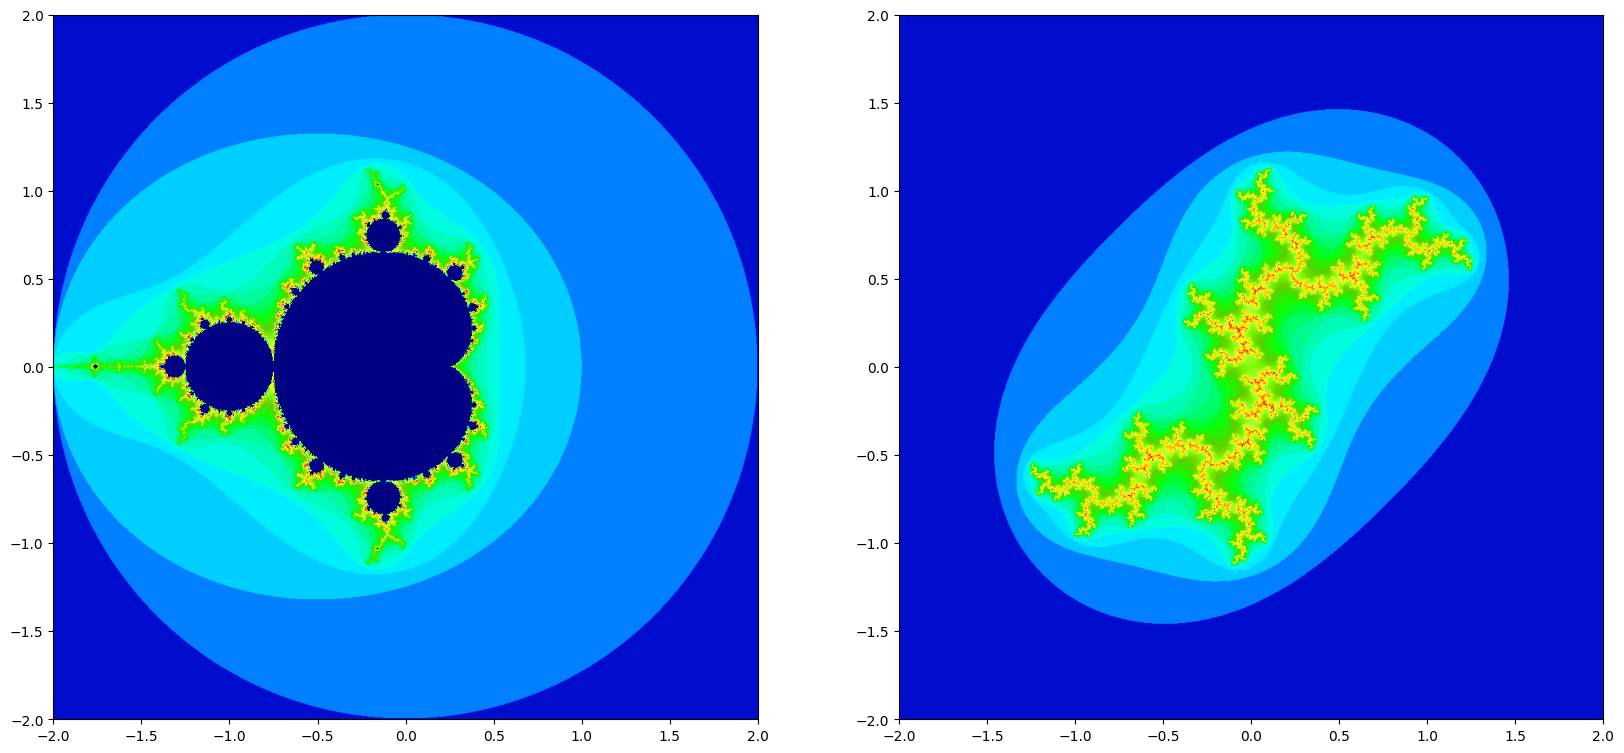

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(
    np.sqrt(draw_mandelbrot(-2, 2, -2, 2, 1000)),
    extent=[-2, 2, -2, 2],
    cmap="gist_ncar",
)
ax2.imshow(
    np.sqrt(draw_julia(-2, 2, -2, 2, 0.8j, 1000)),
    extent=[-2, 2, -2, 2],
    cmap="gist_ncar",
)
fig.show()

In [81]:
from ipycanvas import Canvas

cs = Canvas(width=1600, height=800)
im = draw_mandelbrot(-2, 2, -2,2, 800)
im2 = np.sqrt(np.stack([im, im, im], axis=2)/ np.max(im))*255
im = draw_julia(-2, 2,-2,2,0.8j, 800)
im3 = np.sqrt(np.stack([im, im, im], axis=2)/ np.max(im))*255
cs.put_image_data(im2, 0,0)
cs.put_image_data(im3,800,0)
cs

mandel 1 t: 0.005928516387939453
mandel 1 t: 0.5037076473236084
julia t: 0.10611867904663086


Canvas(height=800, width=1600)

RFBOutputContext()

CanvasBackend(css_height='400px')
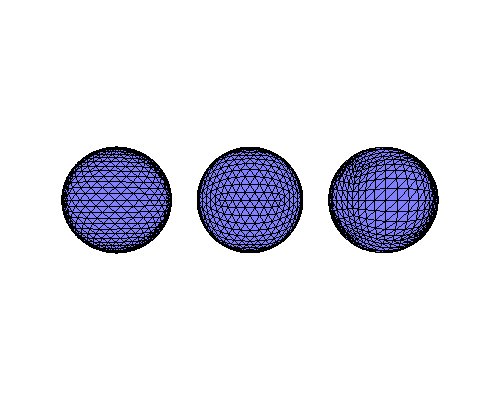

In [1]:
from IPython.display import display
from vispy import scene
from vispy.visuals.transforms import STTransform

canvas = scene.SceneCanvas(keys='interactive', bgcolor='white',
                           size=(500, 400), show=True, resizable=True)

view = canvas.central_widget.add_view()
view.camera = 'arcball'

sphere1 = scene.visuals.Sphere(radius=1, method='latitude', parent=view.scene,
                               edge_color='black')

sphere2 = scene.visuals.Sphere(radius=1, method='ico', parent=view.scene,
                               edge_color='black')

sphere3 = scene.visuals.Sphere(radius=1, rows=10, cols=10, depth=10,
                               method='cube', parent=view.scene,
                               edge_color='black')

sphere1.transform = STTransform(translate=[-2.5, 0, 0])
sphere3.transform = STTransform(translate=[2.5, 0, 0])

view.camera.set_range(x=[-3, 3])
display(canvas)